<h1 style="color:#339ACD; font-size:25px; font-weight: bold;">QuarkCircuit: Construction, Visualization, and Transpilation of Quantum Circuits</h1>

<h2 style="color:#339ACD; font-size:25px; font-weight: bold;">Installation</h2>

<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px; box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.2); font-family: consolas; color: #66BFE7; font-size: 20px;">
    <code>pip install quarkcircuit</code>
</div>


<h2 style="color:#339ACD; font-size:25px; font-weight: bold;">Construct and visualize a quantum circuit</h2>

In [1]:
from quark.circuit import QuantumCircuit

In [2]:
nqubits = 3
qc = QuantumCircuit(nqubits)
qc.h(0)
for i in range(1,nqubits):
    qc.cx(0,i)
qc.barrier()
qc.measure_all()
qc.draw()

<div style="color: #FA8072; font-size:20px;">Note: For better circuit display, please set your chrome or VS Code to a monospaced font, such as "Consolas".</div>

<h2 style="color:#339ACD; font-size:25px; font-weight: bold;">Transpile a quantum circuit</h2>

<h3 style="color:#339ACD; font-size:25px; font-weight: bold;">Build a Backend</h3>

<div style="color:#66BFE7; font-size:20px;">Approach 1: Load BAQIS superconducting quantum computer</div>

In [3]:
from quark.circuit import Backend

In [4]:
chip_name = 'Baihua'
chip_backend = Backend(chip_name)

Baihua configuration loading done!
The last calibration time was 2025-01-20 10:07:06


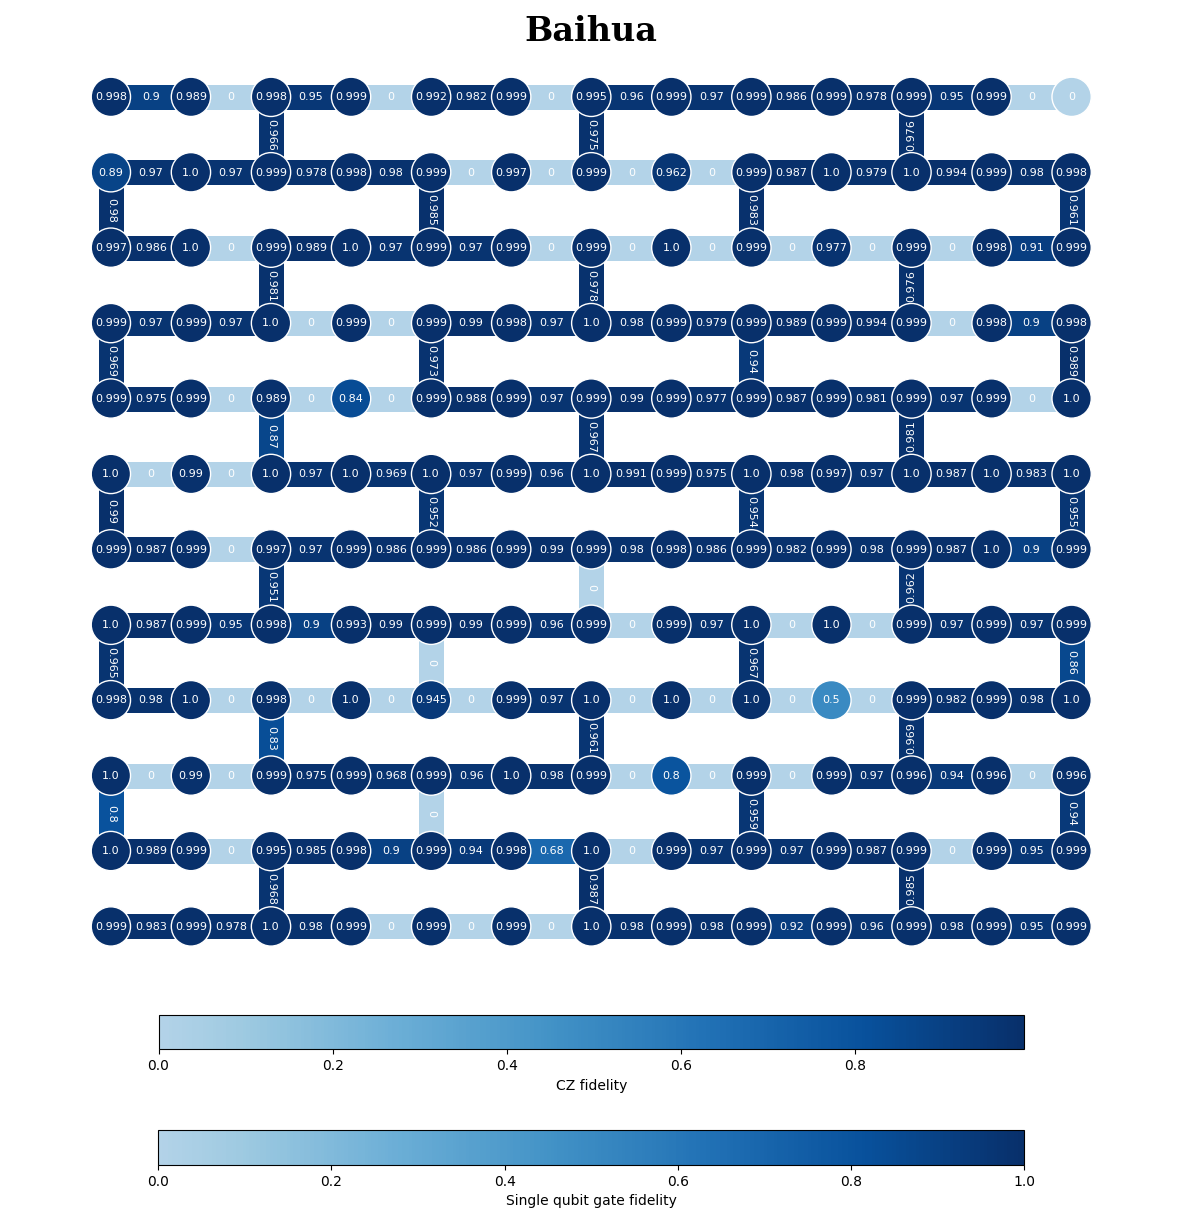

In [7]:
chip_backend.draw(show_couplers_fidelity=True,show_quibts_attributes='fidelity',save_svg_fname='baihua_chip_fig',show_qubits_label=False)

<div style="color:#66BFE7; font-size:20px;">Approach 2: Custom your backend</div>

In [8]:
fake_backend = Backend('Custom')
fake_backend.couplers_with_attributes = [(0,1,{'index':0,'fidelity':0.997}),(1,2,{'index':1,'fidelity':0.998}),(1,3,{'index':2,'fidelity':0.987}),(2,4,{'index':3,'fidelity':0.977}),\
                                         (3,4,{'index':4,'fidelity':0.876}),(4,5,{'index':5,'fidelity':0.988}),(4,6,{'index':6,'fidelity':0.956}),(5,6,{'index':7,'fidelity':0.978}),\
                                         (5,7,{'index':8,'fidelity':0.569}),(6,7,{'index':9,'fidelity':0.658}),(8,9,{'fidelity':0.888}),(9,10,{'fidelity':0.999})]
fake_backend.qubits_with_attributes = [(0,{'coordinate':(1, 1)}) ,(1,{'coordinate':(1,-1) }),(2, {'coordinate':(0,-2) }),(3,{'coordinate':(2,-2) }),\
                                     (4,{'coordinate':(1,-3) }),(5,{'coordinate':(0,-4) }),(6, {'coordinate':(2,-4) }),(7,{'coordinate':(1,-5) }),\
                                     (8,{'coordinate':(0,-6) }),(9,{'coordinate':(1,-6) }),(10,{'coordinate':(2,-6)})]
#fake_backend.draw(show_couplers_fidelity=True)

<h3 style="color:#339ACD; font-size:25px; font-weight: bold;">Transpile</h3>

In [9]:
from quark.circuit import Transpiler

In [10]:
# chip backend
qct1 = Transpiler(qc,chip_backend).run(optimize_level = 1)
print(qct1.depth)
qct1.draw_simply()

Layout qubits [21, 22, 23] are derived from the chip backend priority qubits, 
with the corresponding coupling being [(21, 22), (22, 23)].
The average fidelity of the coupler(s) between the selected qubits is 0.983, and the variance of the fidelity is 1.600000000000003e-05
sabre routing results, after 5 iteration(s)
virtual qubit --> initial mapping --> after routing
    0      -->     22     -->     22    
    1      -->     21     -->     21    
    2      -->     23     -->     23    
Mapping to basic gates done !
5


In [11]:
qct1.to_qlisp

[(('U', 1.5707963267948966, 0.0, 3.141592653589793), 'Q21'),
 (('U', 1.5707963267948966, 0.0, 3.141592653589793), 'Q22'),
 (('U', 1.5707963267948966, 0.0, 3.141592653589793), 'Q23'),
 ('CZ', ('Q22', 'Q21')),
 (('U', 1.5707963267948966, 0.0, 3.141592653589793), 'Q21'),
 ('CZ', ('Q22', 'Q23')),
 (('U', 1.5707963267948966, 0.0, 3.141592653589793), 'Q23'),
 ('Barrier', ('Q22', 'Q21', 'Q23')),
 (('Measure', 1), 'Q21'),
 (('Measure', 0), 'Q22'),
 (('Measure', 2), 'Q23')]

In [12]:
# fake backend
qct2 = Transpiler(qc, fake_backend).run(use_priority=False,optimize_level = 0)
print(qct2.depth)
qct2.draw_simply()

No priority qubits with 3 qubits found. it will check the initial mapping settings for search
Layout qubits [0, 1, 2] are selected by the Transpile algorithm using key = fidelity_mean and topology = nonlinear, 
with the corresponding coupling being [(0, 1), (1, 2)].
The average fidelity of the coupler(s) between the selected qubits is 0.9975, and the variance of the fidelity is 2.5000000000000047e-07
basic routing results:
virtual qubit --> initial mapping --> after routing
    0      -->     0      -->     1     
    1      -->     1      -->     0     
    2      -->     2      -->     2     
Mapping to basic gates done !
7


<h3 style="color:#339ACD; font-size:25px; font-weight: bold;">Submit the circuit to the Baihua backend for execution via QuarkStudio</h3>

In [13]:
from quark import Task
mytoken = '5nCmgtOdsCk8.jZWl8n`8T`KCvNsGObH:dMjnGg``wN/Rg3R{O2R{O15DP3lUO6NEP{dUN7JDd5WnJtJDPxpkO1pUOyBjNx1TNx1TOzBkNjpkJ1GXbjxjJvOnMkGnM{mXdiKHR5i4cimHfjpkJzW3d2Kzf'
tmgr = Task(mytoken)

In [22]:
task = {
  'chip': 'Baihua',  # chip name
  'name': 'MyFirstQuantumTask',  # task name
  'circuit':qct1.to_qlisp, # the transpiled circuit written in qlisp
  'compile': False, # No need to execute transpile again
  'correct': True, # Bayesian correction for the readout
}

In [23]:
tid = tmgr.run(task, repeat=10) # shots = repeat*1024
print(tid) # tid refers to task id

2501031722441083466


In [24]:
tmgr.status()

{'Dongling': 1,
 'Miaofeng': 'Maintenance',
 'Baihua': 1800,
 'Yunmeng': 'Maintenance',
 'Haituo': 'Maintenance'}

In [27]:
tmgr.status(tid)

'Finished'

In [28]:
res = tmgr.result(tid)
res

{'count': {'000': 4170,
  '111': 3592,
  '001': 761,
  '101': 182,
  '110': 974,
  '100': 91,
  '010': 242,
  '011': 228},
 'corrected': {},
 'transpiled': '',
 'qlisp': "[(('U', 1.5707963267948966, 0.0, 3.141592653589793), 'Q21'),\n(('U', 1.5707963267948966, 0.0, 3.141592653589793), 'Q22'),\n(('U', 1.5707963267948966, 0.0, 3.141592653589793), 'Q23'),\n('CZ', ('Q22', 'Q21')),\n(('U', 1.5707963267948966, 0.0, 3.141592653589793), 'Q21'),\n('CZ', ('Q22', 'Q23')),\n(('U', 1.5707963267948966, 0.0, 3.141592653589793), 'Q23'),\n('Barrier', ('Q22', 'Q21', 'Q23')),\n(('Measure', 1), 'Q21'),\n(('Measure', 0), 'Q22'),\n(('Measure', 2), 'Q23')]",
 'tid': 2501031722441083466,
 'error': '',
 'status': 'Finished',
 'created': '2025-01-03-17-22-44',
 'finished': '2025-01-03-17-22-49'}

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '000'),
  Text(1, 0, '001'),
  Text(2, 0, '010'),
  Text(3, 0, '011'),
  Text(4, 0, '100'),
  Text(5, 0, '101'),
  Text(6, 0, '110'),
  Text(7, 0, '111')])

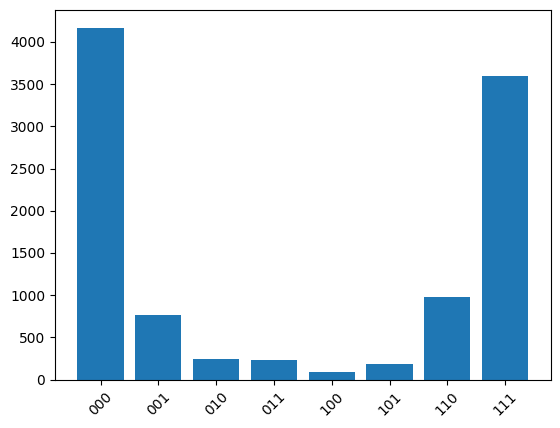

In [29]:
import matplotlib.pyplot as plt
data = res['count']
bases = sorted(data)
count = [data[base] for base in bases]

plt.bar(bases, count)
plt.xticks(rotation=45)

<h3 style="color:#339ACD; font-size:25px; font-weight: bold;">Directly specify quarkcircuit as the QuarkStudio compiler</h3>

In [19]:
task = {
  'chip': 'Dongling',  # chip name
  'name': 'MyFirstQuantumTask',  # task name
  'circuit':qc.to_openqasm2, # the transpiled circuit written in qlisp
  'compile': True, # No need to execute transpile again
  'correct': True, # Bayesian correction for the readout
  'options':{'compiler':'quark','use_priority':False,'initial_mapping':[110,111,112],'optimize_level':1}
}

In [20]:
tid = tmgr.run(task, repeat=1) # shots = repeat*1024
print(tid) # tid refers to task id

2501201012428089352


In [22]:
tmgr.status(tid)

'Finished'

In [23]:
tmgr.result(tid)

{'count': {'001': 37,
  '000': 386,
  '111': 402,
  '101': 42,
  '010': 59,
  '110': 50,
  '011': 39,
  '100': 9},
 'corrected': {},
 'transpiled': '',
 'qlisp': "[(('U', 1.5707963267948966, 0.0, 3.141592653589793), 'Q110'),\n(('U', 1.5707963267948966, 0.0, 3.141592653589793), 'Q111'),\n(('U', 1.5707963267948966, 0.0, 3.141592653589793), 'Q112'),\n('CZ', ('Q111', 'Q110')),\n(('U', 1.5707963267948966, 0.0, 3.141592653589793), 'Q110'),\n('CZ', ('Q111', 'Q112')),\n(('U', 1.5707963267948966, 0.0, 3.141592653589793), 'Q112'),\n('Barrier', ('Q111', 'Q110', 'Q112')),\n(('Measure', 1), 'Q110'),\n(('Measure', 0), 'Q111'),\n(('Measure', 2), 'Q112')]",
 'tid': 2501201012428089352,
 'error': '',
 'status': 'Finished',
 'created': '2025-01-20-10-12-43',
 'finished': '2025-01-20-10-12-44'}

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '000'),
  Text(1, 0, '001'),
  Text(2, 0, '010'),
  Text(3, 0, '011'),
  Text(4, 0, '100'),
  Text(5, 0, '101'),
  Text(6, 0, '110'),
  Text(7, 0, '111')])

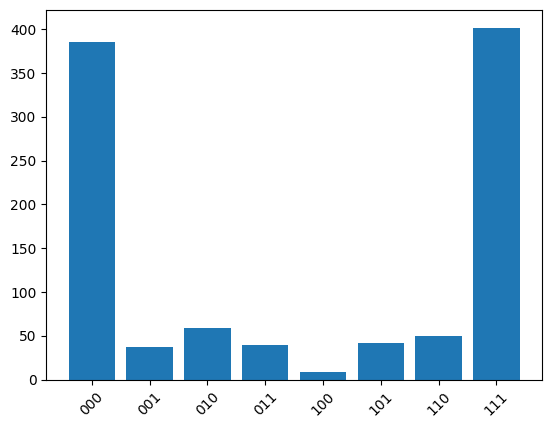

In [24]:
res = tmgr.result(tid)
import matplotlib.pyplot as plt
data = res['count']
bases = sorted(data)
count = [data[base] for base in bases]

plt.bar(bases, count)
plt.xticks(rotation=45)

In [25]:
qc_compiled = QuantumCircuit().from_qlisp(res['qlisp'])
qc_compiled.draw_simply()

<h2 style="color:#339ACD; font-size:25px; font-weight: bold;">Customize Transpiler: Step by step</h2>

In [13]:
from quark.circuit import Backend, Transpiler, generate_ghz_state

In [14]:
# step0: define a quantum circuit need to transpile
nqubits = 4
qc = generate_ghz_state(nqubits)
qc.barrier()
qc.measure_all()
qc.draw()

In [15]:
# step1: specify a backend
chip_name = 'Baihua'
chip_backend = Backend(chip_name)

Baihua configuration loading done!
The last calibration time was 2025-01-16 03:17:04


In [16]:
# step2: specify a layout or select automatically, in this example, the layout is selected automatically. 
qct = Transpiler(qc,chip_backend).run_select_layout() #support custom run_select_layout(use_priority=False,initial_mapping=[53,54,55,56]])
qct.draw_simply()

Layout qubits [21, 22, 23, 24] are derived from the chip backend priority qubits, 
with the corresponding coupling being [(24, 23), (21, 22), (22, 23)].
The average fidelity of the coupler(s) between the selected qubits is 0.9909333333333333, and the variance of the fidelity is 9.235555555555455e-06


In [17]:
# step3: sepcify a routing method, in this example, the basic routing were used.
qct = Transpiler(qc,chip_backend)._select_layout().run_basic_routing() # it will retun a quantum circuit with basic routing applied.
qct.draw_simply()

Layout qubits [21, 22, 23, 24] are derived from the chip backend priority qubits, 
with the corresponding coupling being [(24, 23), (21, 22), (22, 23)].
The average fidelity of the coupler(s) between the selected qubits is 0.9909333333333333, and the variance of the fidelity is 9.235555555555455e-06
basic routing results:
virtual qubit --> initial mapping --> after routing
    0      -->     21     -->     22    
    1      -->     22     -->     23    
    2      -->     23     -->     21    
    3      -->     24     -->     24    
check [22, 23, 21, 24] [(24, 23), (21, 22), (22, 23)]


In [18]:
# step3: sepcify a routing method, in this example, the Sabre routing were used.
qct = Transpiler(qc,chip_backend)._select_layout().run_sabre_routing() 
print(qct.depth)
qct.draw_simply()

Layout qubits [21, 22, 23, 24] are derived from the chip backend priority qubits, 
with the corresponding coupling being [(24, 23), (21, 22), (22, 23)].
The average fidelity of the coupler(s) between the selected qubits is 0.9909333333333333, and the variance of the fidelity is 9.235555555555455e-06
sabre routing results, after 5 iteration(s)
virtual qubit --> initial mapping --> after routing
    0      -->     22     -->     23    
    1      -->     21     -->     21    
    2      -->     23     -->     22    
    3      -->     24     -->     24    
6


In [19]:
# step4: convert the routed circuit into basic gates (U3 and CZ gates).
qct = Transpiler(qc,chip_backend)._select_layout()._basic_routing().run_basic_gates()
print(qct.depth)
qct.draw_simply()

Layout qubits [21, 22, 23, 24] are derived from the chip backend priority qubits, 
with the corresponding coupling being [(24, 23), (21, 22), (22, 23)].
The average fidelity of the coupler(s) between the selected qubits is 0.9909333333333333, and the variance of the fidelity is 9.235555555555455e-06
basic routing results:
virtual qubit --> initial mapping --> after routing
    0      -->     21     -->     22    
    1      -->     22     -->     23    
    2      -->     23     -->     21    
    3      -->     24     -->     24    
Mapping to basic gates done !
22


In [20]:
# step5: perform single- and two-qubit gate optimization.
qct = Transpiler(qc,chip_backend)._select_layout()._basic_routing()._basic_gates().run_gate_optimize()
print(qct.depth)
qct.draw_simply()

Layout qubits [21, 22, 23, 24] are derived from the chip backend priority qubits, 
with the corresponding coupling being [(24, 23), (21, 22), (22, 23)].
The average fidelity of the coupler(s) between the selected qubits is 0.9909333333333333, and the variance of the fidelity is 9.235555555555455e-06
basic routing results:
virtual qubit --> initial mapping --> after routing
    0      -->     21     -->     22    
    1      -->     22     -->     23    
    2      -->     23     -->     21    
    3      -->     24     -->     24    
Mapping to basic gates done !
10


<h2 style="color:#339ACD; font-size:25px; font-weight: bold;">Transpiler Supplementary: Individually invoke each function.</h2>

In [21]:
nqubits = 3
qc = generate_ghz_state(nqubits)
transpler = Transpiler(qc)
print('default initial mapping and coupling:',transpler.initial_mapping,transpler.coupling_map)
qct = transpler.run_basic_gates()
qct.draw()

default initial mapping and coupling: [0, 1, 2] [(0, 1), (1, 2)]
Mapping to basic gates done !


In [22]:
nqubits = 3
qc = generate_ghz_state(nqubits)
transpler = Transpiler(qc)
transpler.initial_mapping = [1,0,2]
transpler.coupling_map = [(0,1),(1,2)]
print('initial mapping and coupling:',transpler.initial_mapping,transpler.coupling_map)
qct = transpler.run_basic_routing()
qct.draw()

initial mapping and coupling: [1, 0, 2] [(0, 1), (1, 2)]
basic routing results:
virtual qubit --> initial mapping --> after routing
    0      -->     1      -->     1     
    1      -->     0      -->     0     
    2      -->     2      -->     2     
check [1, 0, 2] [(0, 1), (1, 2)]


In [23]:
nqubits = 3
qc = generate_ghz_state(nqubits)
transpler = Transpiler(qc)
print('default initial mapping and coupling:',transpler.initial_mapping,transpler.coupling_map)
qct = transpler.run_sabre_routing()
qct.draw()

default initial mapping and coupling: [0, 1, 2] [(0, 1), (1, 2)]
sabre routing results, after 5 iteration(s)
virtual qubit --> initial mapping --> after routing
    0      -->     1      -->     1     
    1      -->     0      -->     0     
    2      -->     2      -->     2     
